<a href="https://colab.research.google.com/github/pankaj-beldar/patent-data-NLP-classification/blob/main/patent_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import missingno as msno
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [3]:


# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/data.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Exploring first 5 rows for better understanding of data
df.head()

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y
0,2023-01-01 00:00:00,2023-01-06,Mumbai,PCT NATIONAL PHASE APPLICATION,10/MUMNP/2013,2013-01-02,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,CHEMISTRY,16.0,18.0,2023-10-03
1,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10044/DELNP/2015,2015-10-27,VEHICLE CONTROL DEVICE,MECHANICAL,29.0,7.0,2023-10-03
2,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10065/DELNP/2013,2013-11-22,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...,BIOTECHNOLOGY,107.0,78.0,2023-10-03
3,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10088/DELNP/2013,2013-11-25,METHOD FOR CLEANING AND STRIPPING A TURBOSHAFT...,MECHANICAL,19.0,10.0,2023-10-03
4,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10104/DELNP/2012,2012-11-21,MATERIAL TREATMENT AND APPARATUS,MECHANICAL,22.0,11.0,2023-10-03


In [5]:

df.describe()

,NO_OF_PAGES,NO_OF_CLAIMS
count,35162.000000,35180.000000
mean,37.932171,17.224019
std,46.895004,15.444432
min,1.000000,1.000000
25%,19.000000,10.000000
50%,27.000000,14.000000
75%,41.000000,20.000000
max,2380.000000,374.000000


In [6]:

df.columns

Index(['PUBLICATION_NUMBER', 'PUBLICATION_DATE', 'IPO_LOCATION',
       'APPLICATION_TYPE_DESC', 'APPLICATION_NUMBER', 'DATE_OF_FILING',
       'TITLE_OF_INVENTION', 'FIELD_OF_INVENTION', 'NO_OF_PAGES',
       'NO_OF_CLAIMS', 'DATE_UPDATED_d_m_y'],
      dtype='object')

In [7]:

df.shape

(35206, 11)

In [8]:

# Checking info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35206 entries, 0 to 35205
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PUBLICATION_NUMBER     35206 non-null  object        
 1   PUBLICATION_DATE       35206 non-null  datetime64[ns]
 2   IPO_LOCATION           35206 non-null  object        
 3   APPLICATION_TYPE_DESC  35206 non-null  object        
 4   APPLICATION_NUMBER     35206 non-null  object        
 5   DATE_OF_FILING         35206 non-null  datetime64[ns]
 6   TITLE_OF_INVENTION     35205 non-null  object        
 7   FIELD_OF_INVENTION     35205 non-null  object        
 8   NO_OF_PAGES            35162 non-null  float64       
 9   NO_OF_CLAIMS           35180 non-null  float64       
 10  DATE_UPDATED_d_m_y     35206 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(6)
memory usage: 3.0+ MB


In [9]:

#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
NO_OF_PAGES,35206,44,0.12
NO_OF_CLAIMS,35206,26,0.07
TITLE_OF_INVENTION,35206,1,0.00
FIELD_OF_INVENTION,35206,1,0.00
PUBLICATION_NUMBER,35206,0,0.00
PUBLICATION_DATE,35206,0,0.00
IPO_LOCATION,35206,0,0.00
APPLICATION_TYPE_DESC,35206,0,0.00
APPLICATION_NUMBER,35206,0,0.00
DATE_OF_FILING,35206,0,0.00


Text(0.5, 1.0, 'Missing Values in Dataset')

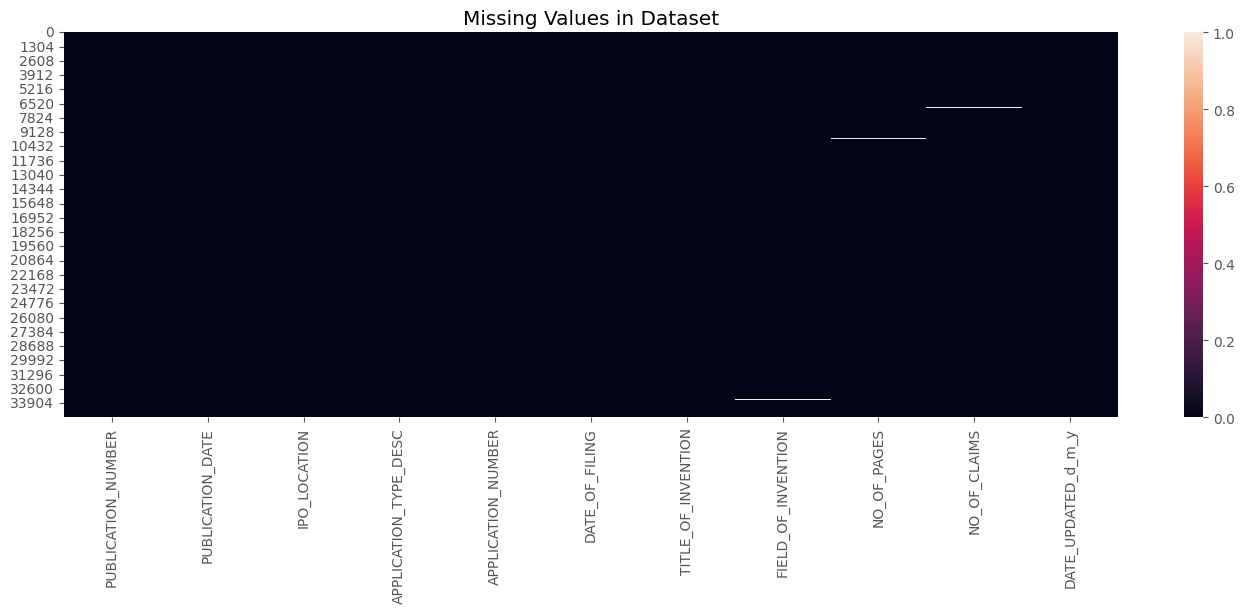

In [10]:

plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True)
plt.title('Missing Values in Dataset')

In [11]:
#Handling of Missing Values
df['NO_OF_PAGES'].replace(np.nan, 37.92,inplace  = True)                  #replace null values by mean 37.93
df['NO_OF_CLAIMS'].replace(np.nan, 17.22,inplace  = True)         #replace null values by mean
df['TITLE_OF_INVENTION'].replace(np.nan, 'unknown',inplace  = True)                  #replace null values by unknown
df['FIELD_OF_INVENTION'].replace(np.nan,'MECHANICAL',inplace= True)       #replace null values by most frequent date



In [12]:
#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
PUBLICATION_NUMBER,35206,0,0.0
PUBLICATION_DATE,35206,0,0.0
IPO_LOCATION,35206,0,0.0
APPLICATION_TYPE_DESC,35206,0,0.0
APPLICATION_NUMBER,35206,0,0.0
DATE_OF_FILING,35206,0,0.0
TITLE_OF_INVENTION,35206,0,0.0
FIELD_OF_INVENTION,35206,0,0.0
NO_OF_PAGES,35206,0,0.0
NO_OF_CLAIMS,35206,0,0.0


Text(0.5, 1.0, 'Removal of Missing Values in Dataset')

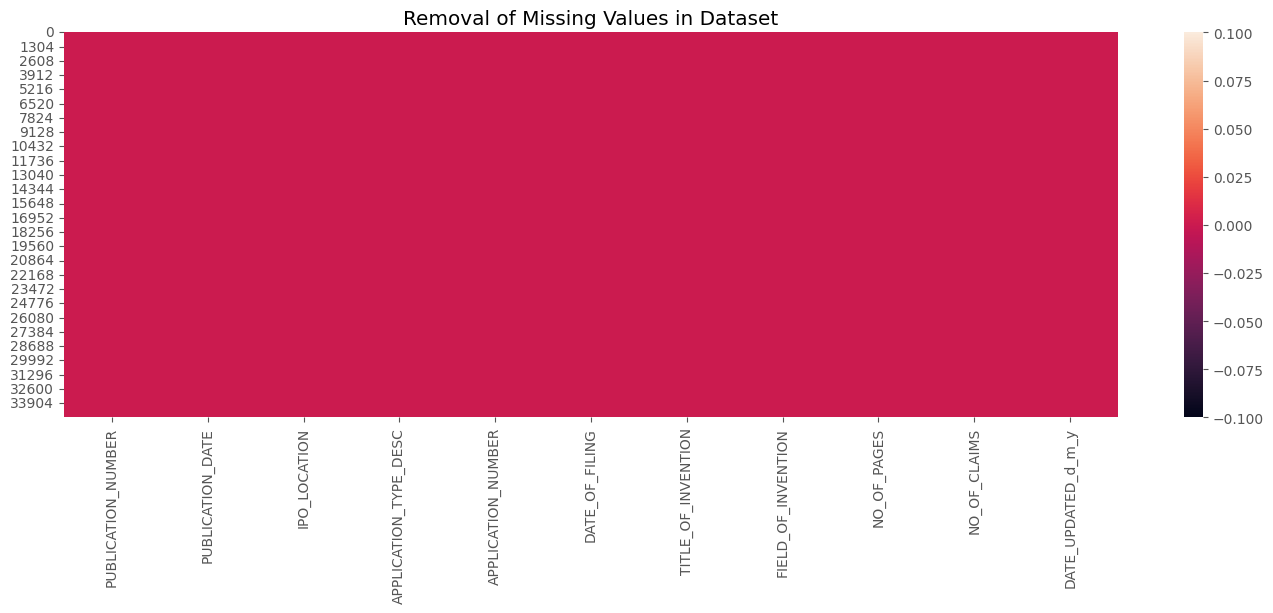

In [13]:

#Plot Missing Values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True)
plt.title('Removal of Missing Values in Dataset')

In [14]:

#  checking duplicate values
df.duplicated().sum()

20

In [15]:
df_no_duplicates = df.drop_duplicates()

In [16]:

#  checking duplicate values
df_no_duplicates.duplicated().sum()

0

In [17]:

# Create new features to store date, day, month and year seperately.
df['date_filing'] = pd.to_datetime(df['DATE_OF_FILING'])  # First convert date_added to date time format.
df['day_filing'] = df['DATE_OF_FILING'].dt.day            # Compute day.
df['year_filing'] =df['DATE_OF_FILING'].dt.year          # Compute year.
df['month_filing'] =df['DATE_OF_FILING'].dt.month        # Compute month.

In [18]:

df.head()

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y,date_filing,day_filing,year_filing,month_filing
0,2023-01-01 00:00:00,2023-01-06,Mumbai,PCT NATIONAL PHASE APPLICATION,10/MUMNP/2013,2013-01-02,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,CHEMISTRY,16.0,18.0,2023-10-03,2013-01-02,2,2013,1
1,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10044/DELNP/2015,2015-10-27,VEHICLE CONTROL DEVICE,MECHANICAL,29.0,7.0,2023-10-03,2015-10-27,27,2015,10
2,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10065/DELNP/2013,2013-11-22,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...,BIOTECHNOLOGY,107.0,78.0,2023-10-03,2013-11-22,22,2013,11
3,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10088/DELNP/2013,2013-11-25,METHOD FOR CLEANING AND STRIPPING A TURBOSHAFT...,MECHANICAL,19.0,10.0,2023-10-03,2013-11-25,25,2013,11
4,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10104/DELNP/2012,2012-11-21,MATERIAL TREATMENT AND APPARATUS,MECHANICAL,22.0,11.0,2023-10-03,2012-11-21,21,2012,11


In [19]:
# Convert date strings to datetime objects
df['PUBLICATION_DATE'] = pd.to_datetime(df['PUBLICATION_DATE'])
df['DATE_OF_FILING'] = pd.to_datetime(df['DATE_OF_FILING'])

# Calculate the number of days between DATE_OF_FILING and PUBLICATION_DATE
df['days_required_to_publish'] = (df['PUBLICATION_DATE'] - df['DATE_OF_FILING']).dt.days

# Print the updated DataFrame
df.head()








,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y,date_filing,day_filing,year_filing,month_filing,days_required_to_publish
0,2023-01-01 00:00:00,2023-01-06,Mumbai,PCT NATIONAL PHASE APPLICATION,10/MUMNP/2013,2013-01-02,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,CHEMISTRY,16.0,18.0,2023-10-03,2013-01-02,2,2013,1,3656
1,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10044/DELNP/2015,2015-10-27,VEHICLE CONTROL DEVICE,MECHANICAL,29.0,7.0,2023-10-03,2015-10-27,27,2015,10,2628
2,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10065/DELNP/2013,2013-11-22,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...,BIOTECHNOLOGY,107.0,78.0,2023-10-03,2013-11-22,22,2013,11,3332
3,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10088/DELNP/2013,2013-11-25,METHOD FOR CLEANING AND STRIPPING A TURBOSHAFT...,MECHANICAL,19.0,10.0,2023-10-03,2013-11-25,25,2013,11,3329
4,2023-01-01 00:00:00,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,10104/DELNP/2012,2012-11-21,MATERIAL TREATMENT AND APPARATUS,MECHANICAL,22.0,11.0,2023-10-03,2012-11-21,21,2012,11,3698


In [20]:
df.drop('PUBLICATION_NUMBER',axis=1, inplace=True)
df.drop('APPLICATION_NUMBER',axis=1,inplace=True)
df.head(2)

,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y,date_filing,day_filing,year_filing,month_filing,days_required_to_publish
0,2023-01-06,Mumbai,PCT NATIONAL PHASE APPLICATION,2013-01-02,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,CHEMISTRY,16.0,18.0,2023-10-03,2013-01-02,2,2013,1,3656
1,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,2015-10-27,VEHICLE CONTROL DEVICE,MECHANICAL,29.0,7.0,2023-10-03,2015-10-27,27,2015,10,2628


# **Exploratory Data Analysis**

In [21]:

# create type of content df
df_FIELD_OF_INVENTION=pd.DataFrame(df['FIELD_OF_INVENTION'].value_counts())
df_FIELD_OF_INVENTION.reset_index(inplace=True)
df_FIELD_OF_INVENTION.rename(columns = {'index':'field', 'FIELD_OF_INVENTION':'count'}, inplace = True)
df_FIELD_OF_INVENTION

,field,count
0,MECHANICAL,9659
1,CHEMISTRY,4894
2,ELECTRONICS,3772
3,ELECTRICAL,2973
4,COMPUTER,2790
5,COMMUNICATION,2422
6,PHYSICS,1996
7,BIOMEDICAL,1482
8,BIOTECHNOLOGY,1277
9,POLYMER,1099


In [22]:
df_IPO_LOCATION=pd.DataFrame(df['IPO_LOCATION'].value_counts())
df_IPO_LOCATION.reset_index(inplace=True)
df_IPO_LOCATION.rename(columns = {'index':'IPO_LOCATION', 'IPO_LOCATION':'count'}, inplace = True)
df_IPO_LOCATION

,IPO_LOCATION,count
0,Delhi,14238
1,Chennai,11179
2,Mumbai,5785
3,Kolkata,4004


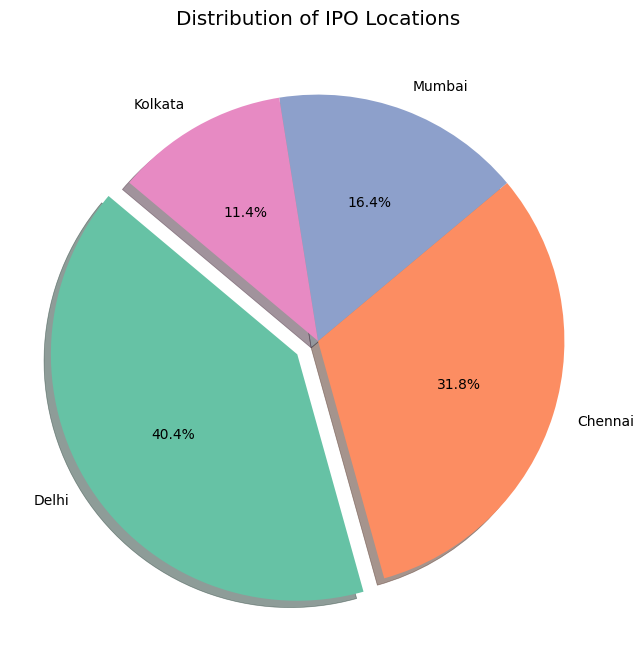

In [23]:
import matplotlib.pyplot as plt

# Data
locations = ['Delhi', 'Chennai', 'Mumbai', 'Kolkata']
count = [14238, 11179, 5785, 4004]
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
# Create a pie chart
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)
plt.pie(count, labels=locations, autopct='%1.1f%%',explode=explode, startangle=140, shadow=True,colors=colors)
plt.title('Distribution of IPO Locations')
plt.show()


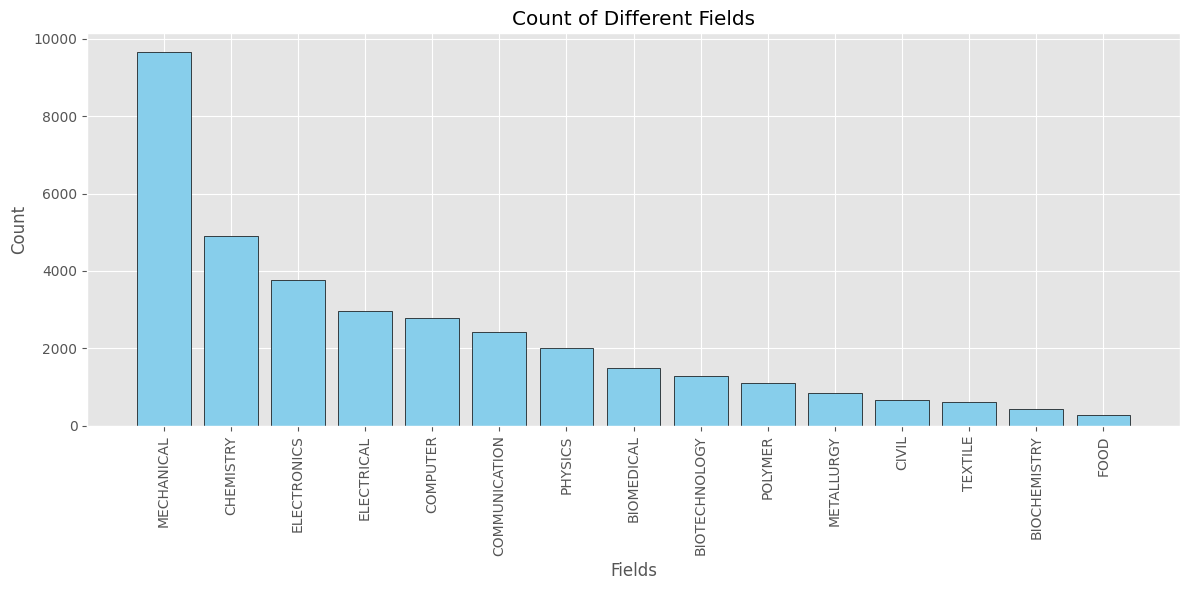

In [24]:
import matplotlib.pyplot as plt

# Data
fields = ['MECHANICAL', 'CHEMISTRY', 'ELECTRONICS', 'ELECTRICAL', 'COMPUTER', 'COMMUNICATION',
          'PHYSICS', 'BIOMEDICAL', 'BIOTECHNOLOGY', 'POLYMER', 'METALLURGY', 'CIVIL', 'TEXTILE',
          'BIOCHEMISTRY', 'FOOD']
count = [9658, 4894, 3772, 2973, 2790, 2422, 1996, 1482, 1277, 1099, 844, 669, 622, 436, 271]

# Create a vertical bar chart
plt.figure(figsize=(12, 6))
plt.bar(fields, count, color='skyblue', edgecolor='k')
plt.xlabel('Fields')
plt.ylabel('Count')
plt.title('Count of Different Fields')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure the labels fit into the figure area
plt.show()


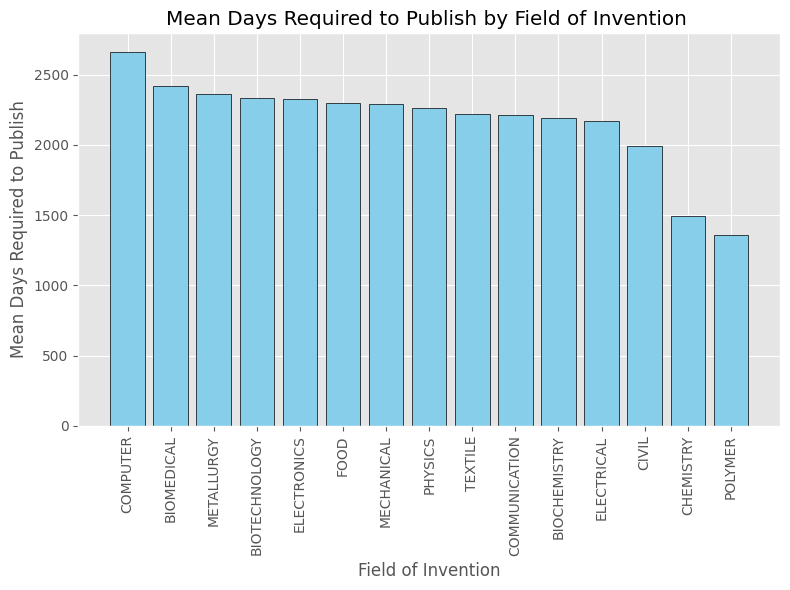

In [35]:

# Create a DataFrame
result_df = pd.DataFrame(df)
import pandas as pd
import matplotlib.pyplot as plt



# Group the DataFrame by 'FIELD_OF_INVENTION' and calculate the mean for each group
grouped_df = result_df.groupby('FIELD_OF_INVENTION')['days_required_to_publish'].mean().reset_index()

# Sort the grouped DataFrame by mean days_required_to_publish in descending order
grouped_df = grouped_df.sort_values(by='days_required_to_publish', ascending=False)

# Create a bar plot for the mean days required to publish by field (sorted in descending order)
plt.figure(figsize=(8, 6))
plt.bar(grouped_df['FIELD_OF_INVENTION'], grouped_df['days_required_to_publish'], color='skyblue',edgecolor='k')
plt.xlabel('Field of Invention')
plt.ylabel('Mean Days Required to Publish')
plt.title('Mean Days Required to Publish by Field of Invention ')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



In [36]:
# create type of content df
df_APPLICATION_TYPE_DESC=pd.DataFrame(df['APPLICATION_TYPE_DESC'].value_counts())
df_APPLICATION_TYPE_DESC.reset_index(inplace=True)
df_APPLICATION_TYPE_DESC.rename(columns = {'index':'APPLICATION_TYPE_DES', 'APPLICATION_TYPE_DESC':'count'}, inplace = True)
df_APPLICATION_TYPE_DESC

,APPLICATION_TYPE_DES,count
0,PCT NATIONAL PHASE APPLICATION,22100
1,ORDINARY APPLICATION,8811
2,CONVENTION APPLICATION,3573
3,DIVISIONAL PCT NATIONAL PHASE APPLICATION,605
4,PATENT OF ADDITION FOR ORDINARY APPLICATION,56
5,DIVISIONAL ORDINARY APPLICATION,28
6,DIVISIONAL CONVENTION APPLICATION,28
7,PATENT OF ADDITION FOR PCT NATIONAL PHASE APPL...,4
8,PATENT OF ADDITION FOR CONVENTION APPLICATION,1


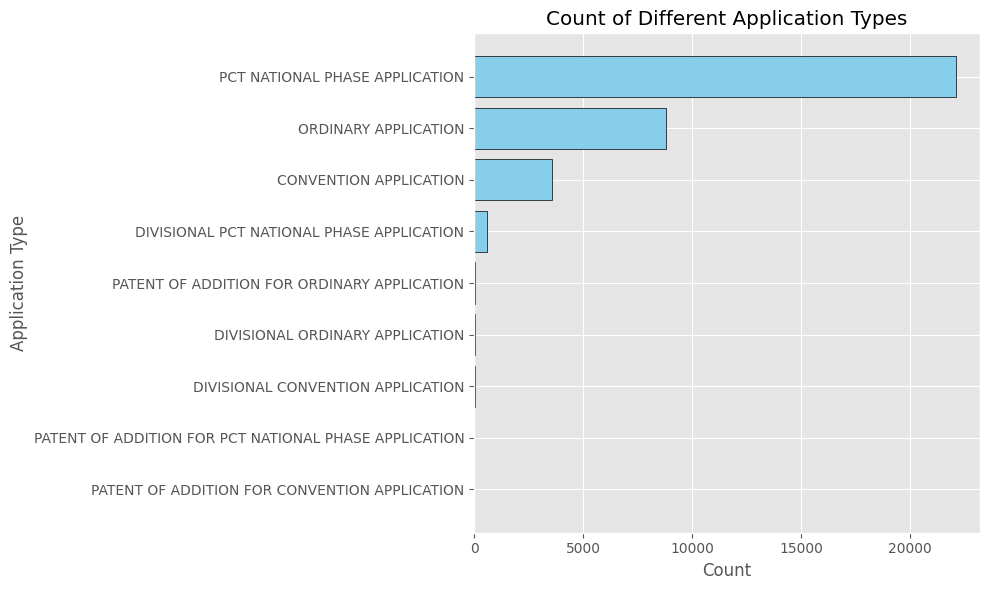

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'APPLICATION_TYPE_DESC': [
        'PCT NATIONAL PHASE APPLICATION',
        'ORDINARY APPLICATION',
        'CONVENTION APPLICATION',
        'DIVISIONAL PCT NATIONAL PHASE APPLICATION',
        'PATENT OF ADDITION FOR ORDINARY APPLICATION',
        'DIVISIONAL ORDINARY APPLICATION',
        'DIVISIONAL CONVENTION APPLICATION',
        'PATENT OF ADDITION FOR PCT NATIONAL PHASE APPLICATION',
        'PATENT OF ADDITION FOR CONVENTION APPLICATION'
    ],
    'count': [22100, 8811, 3573, 605, 56, 28, 28, 4, 1]
}

# Create a DataFrame
df1 = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df1['APPLICATION_TYPE_DESC'], df1['count'], color='skyblue',edgecolor='k')
plt.xlabel('Count')
plt.ylabel('Application Type')
plt.title('Count of Different Application Types')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.tight_layout()
plt.show()


# **Text Processing**

In [38]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#create a function to trasform text
def transform_text(text):
    # covert to lower case
    text = text.lower()
    # tokenize text
    text = nltk.word_tokenize(text)
    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    # remove stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    # stemming text
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)




In [40]:

# stemming object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:

#apply function to required column
df['new_title'] = df['TITLE_OF_INVENTION'].apply(transform_text)

In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['new_title'].apply(lambda x: [item for item in x if item not in stop])
df['new_title']= df['new_title'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [45]:


df.head()

,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y,date_filing,day_filing,year_filing,month_filing,days_required_to_publish,new_title
0,2023-01-06,Mumbai,PCT NATIONAL PHASE APPLICATION,2013-01-02,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,CHEMISTRY,16.0,18.0,2023-10-03,2013-01-02,2,2013,1,3656,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...
1,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,2015-10-27,VEHICLE CONTROL DEVICE,MECHANICAL,29.0,7.0,2023-10-03,2015-10-27,27,2015,10,2628,VEHICLE CONTROL DEVICE
2,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,2013-11-22,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...,BIOTECHNOLOGY,107.0,78.0,2023-10-03,2013-11-22,22,2013,11,3332,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...
3,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,2013-11-25,METHOD FOR CLEANING AND STRIPPING A TURBOSHAFT...,MECHANICAL,19.0,10.0,2023-10-03,2013-11-25,25,2013,11,3329,METHOD FOR CLEANING AND STRIPPING TURBOSHAFT E...
4,2023-01-06,Delhi,PCT NATIONAL PHASE APPLICATION,2012-11-21,MATERIAL TREATMENT AND APPARATUS,MECHANICAL,22.0,11.0,2023-10-03,2012-11-21,21,2012,11,3698,MATERIAL TREATMENT AND APPARATUS
